In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 加载数据
tr_data = pd.read_csv('./train_data.csv')
print tr_data.head()

# 样本量 特征量
m, n = tr_data.shape[0], tr_data.shape[1] - 1
print m, n

# 将样本的示例与标记拆分开
X = tr_data[tr_data.columns[:-1]]
Y = tr_data[tr_data.columns[-1:]]
print X.head()
print Y.head()

# 提前计算Gram矩阵
G = X.values.dot(X.values.T)
print G

    x0   x1  y
0  3.0  3.0  1
1  4.0  3.0  1
2  1.0  1.0 -1
3 2
    x0   x1
0  3.0  3.0
1  4.0  3.0
2  1.0  1.0
   y
0  1
1  1
2 -1
[[18. 21.  6.]
 [21. 25.  7.]
 [ 6.  7.  2.]]


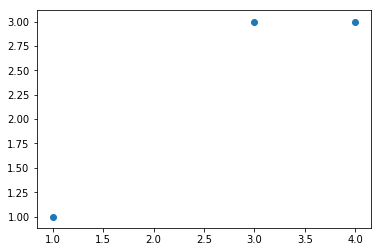

In [3]:
# 创建一个可视化界面
plt.scatter(X['x0'].values.T, X['x1'].values.T)

In [14]:
# 第一步：选择一个初始的 w,b 设定学习率
a = np.array([[0.0]] * m)
b = np.array([[1.0]])
r = 1
print a
print b
print r
#print ((a * Y.values).T.dot(G) + b).T * Y.values

while True: # 当样本是线性可分的，必然收敛

    # 计算在当前a和b条件下，分类是否正确
    delta_sign = ((a * Y.values).T.dot(G) + b).T * Y.values
    print 'current sign'
    print delta_sign

    # 筛选出 sign <= 0的样本
    error_samples = tr_data[delta_sign <= 0]
    
    # 如果分错样本集为空，说明已经迭代结束
    if error_samples.empty:
        break
        
    # 从错误分类样本中，抽样一个样本进行迭代
    sample = error_samples.sample()
    index = sample.index[0]
    ey = sample[sample.columns[-1:]]
    print 'error_sample'
    print sample

    # 迭代更新w和b
    a[index][0] = a[index][0] + r
    b = b + ey.values * r
    print 'current a, b'
    print a
    print b

w = np.array([np.sum(a * Y.values * X, axis=0)]).T
print 'w='
print w

[[0.]
 [0.]
 [0.]]
[[1.]]
1
current sign
[[ 1.]
 [ 1.]
 [-1.]]
error_sample
    x0   x1  y
2  1.0  1.0 -1
current a, b
[[0.]
 [0.]
 [1.]]
[[0.]]
current sign
[[-6.]
 [-7.]
 [ 2.]]
error_sample
    x0   x1  y
0  3.0  3.0  1
current a, b
[[1.]
 [0.]
 [1.]]
[[1.]]
current sign
[[13.]
 [15.]
 [-5.]]
error_sample
    x0   x1  y
2  1.0  1.0 -1
current a, b
[[1.]
 [0.]
 [2.]]
[[0.]]
current sign
[[ 6.]
 [ 7.]
 [-2.]]
error_sample
    x0   x1  y
2  1.0  1.0 -1
current a, b
[[1.]
 [0.]
 [3.]]
[[-1.]]
current sign
[[-1.]
 [-1.]
 [ 1.]]
error_sample
    x0   x1  y
0  3.0  3.0  1
current a, b
[[2.]
 [0.]
 [3.]]
[[0.]]
current sign
[[18.]
 [21.]
 [-6.]]
error_sample
    x0   x1  y
2  1.0  1.0 -1
current a, b
[[2.]
 [0.]
 [4.]]
[[-1.]]
current sign
[[11.]
 [13.]
 [-3.]]
error_sample
    x0   x1  y
2  1.0  1.0 -1
current a, b
[[2.]
 [0.]
 [5.]]
[[-2.]]
current sign
[[ 4.]
 [ 5.]
 [-0.]]
error_sample
    x0   x1  y
2  1.0  1.0 -1
current a, b
[[2.]
 [0.]
 [6.]]
[[-3.]]
current sign
[[-3.]
 [-3.]
 [ 3.

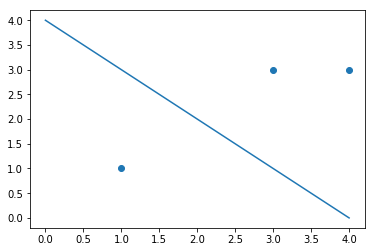

In [15]:
# 画出最终的结果
plt.scatter(X['x0'].values.T, X['x1'].values.T)
plt.plot([0, 4], [(-b[0][0] - w[0][0] * 0) / w[1][0], (-b[0][0] - w[0][0] * 4) / w[1][0]])

In [16]:
# 预测
te_data = pd.read_csv('./test_data.csv')
print te_data.head()

# 将样本的示例与标记拆分开
tX = te_data[te_data.columns[:-1]]

print (tX.values.dot(w) + b) >= 0

    x0   x1  y
0  0.0  0.0 -1
1  4.0  4.0  1
[[False]
 [ True]]
